In [ ]:
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


## Import necessary scikit libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load Dataset
df = pd.read_csv('../data/spam.csv', encoding='latin-1')
df.head()

Index(['Label', 'Message'], dtype='object')

In [31]:
# Encode Labels
df['Label_Num'] = df['Label'].map({'ham': 0, 'spam': 1})

In [32]:
# Split Data
X = df['Message']
y = df['Label_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Vectorize Messages
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Variant 1: Multinomial Naive Bayes

In [34]:
# Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [35]:
print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9483471074380165

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       842
           1       1.00      0.60      0.75       126

    accuracy                           0.95       968
   macro avg       0.97      0.80      0.86       968
weighted avg       0.95      0.95      0.94       968



Text(0.5, 1.0, 'Confusion Matrix')

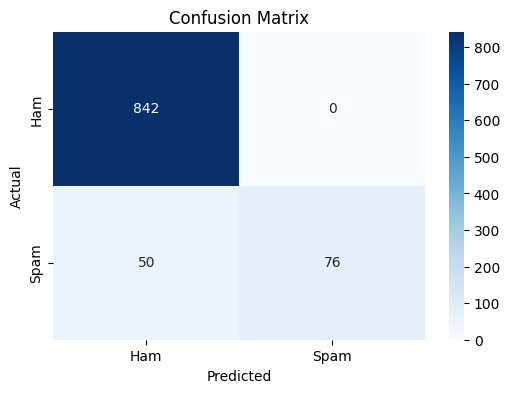

In [36]:
# Confusuion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, 
            annot = True, 
            fmt= 'd',
            cmap = 'Blues', 
            xticklabels = ['Ham', 'Spam'],
            yticklabels = ['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

## Variant 2 : Gaussian Naive Bayes

In [37]:
# Vectorize Messages
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


In [38]:
# Train Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train_vec, y_train)
y_gnb_pred = gnb_model.predict(X_test_vec)

In [39]:
# Accuracy and Report
print("Gaussian NB Accuracy Score:" , accuracy_score(y_test, y_gnb_pred))
print("\nGaussian NB Classification Report:\n", classification_report(y_test, y_gnb_pred))


Gaussian NB Accuracy Score: 0.8832644628099173

Gaussian NB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       842
           1       0.54      0.74      0.62       126

    accuracy                           0.88       968
   macro avg       0.75      0.82      0.78       968
weighted avg       0.90      0.88      0.89       968

